# Noisy gradient descent experiments
This notebook includes experiments for noisy gradient descent with partial and full covariance.

In [4]:
import jax.numpy as jnp
from jax import random
from noisy_gradient_descent import *
from gradient_descent import gradient_descent_update
from network import *
jax.config.update('jax_platform_name', 'cpu')


This test case approximates $y = x$ for $x \in [0,1]$

In [2]:
SIMULATION_RUNS = 10
TIME_SIZE = 0.001
FINAL_TIME = 1.0
LEARNING_RATE = 0.1
noisy_gradient_descent_iterations = int(LEARNING_RATE / TIME_SIZE)

x = jnp.linspace(0.0, 2.0, 100).reshape((100, 1))
y = x
total_weight_full_covariance = []
total_weight_partial_covariance = []
key = random.PRNGKey(4)
for _ in range(SIMULATION_RUNS):
    key, _ = random.split(key)
    sizes = (1, 1)
    parital_covariance_parameters = initialize_network_parameters(key, sizes)
    full_covariance_parameters = initialize_network_parameters(key, sizes)
    gradient_descent_parameters = initialize_network_parameters(key, sizes)
    time = jnp.arange(0.0, FINAL_TIME, TIME_SIZE)
    weight_full_covariance = []
    weight_partial_covariance = []
    weight_gradient_descent = []
    iterations = 1
    max_iterations = time.size

    weight_full_covariance.append(parital_covariance_parameters[0][0][0])
    weight_partial_covariance.append(full_covariance_parameters[0][0][0])
    weight_gradient_descent.append(gradient_descent_parameters[0][0][0])
    full_sigma_norms = []
    partial_sigma_norms = []
    while True:
        key, subkey = random.split(key)
        for _ in range(noisy_gradient_descent_iterations):
            iterations += 1
            if iterations > max_iterations:
                break
            key, subkey = random.split(key)
            full_covariance_parameters, full_sigma_norm = full_covariance_update(
                subkey, full_covariance_parameters, sizes, x, y, TIME_SIZE,
                LEARNING_RATE)
            weight_full_covariance.append(full_covariance_parameters[0][0][0])
            full_sigma_norms.append(full_sigma_norm)
            key, subkey = random.split(key)
            parital_covariance_parameters, partial_sigma_norm = partial_covariance_update(
                subkey, parital_covariance_parameters, x, y, TIME_SIZE,
                LEARNING_RATE)
            weight_partial_covariance.append(
                parital_covariance_parameters[0][0][0])
            partial_sigma_norms.append(partial_sigma_norm)

        if iterations > max_iterations:
            break
        gradient_descent_parameters = gradient_descent_update(
            gradient_descent_parameters, x, y, LEARNING_RATE)
        weight_gradient_descent.append(gradient_descent_parameters[0][0][0])
        print(f'Iterations: {iterations}/{max_iterations}')
    total_weight_full_covariance.append(weight_full_covariance)
    total_weight_partial_covariance.append(weight_partial_covariance)


# plt.savefig('/home/jonathan/forest/images/large_learn_rate.png')

Iterations: 101/1000
Iterations: 201/1000
Iterations: 301/1000
Iterations: 401/1000
Iterations: 501/1000
Iterations: 601/1000
Iterations: 701/1000
Iterations: 801/1000
Iterations: 901/1000


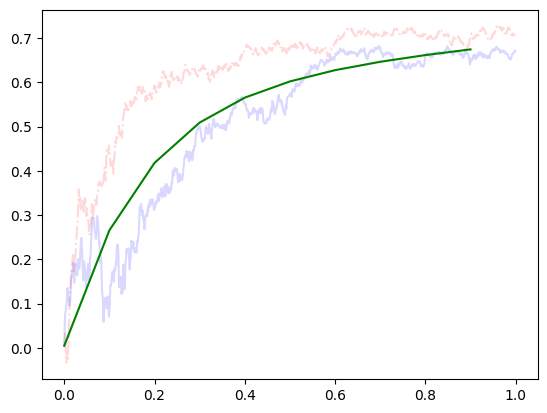

In [3]:
# I could check weak convergence to sgd
plt.figure()
for i in range(SIMULATION_RUNS):
    plt.plot(time,
             jnp.array(total_weight_full_covariance[i]).flatten(),
             "r-.",
             alpha=.15)
    plt.plot(time,
             jnp.array(total_weight_partial_covariance[i]).flatten(),'b-', alpha=.15)
plt.plot(time[::noisy_gradient_descent_iterations],
        jnp.array(weight_gradient_descent).flatten(),
        "g-",
        label=f"Gradient descent weight")

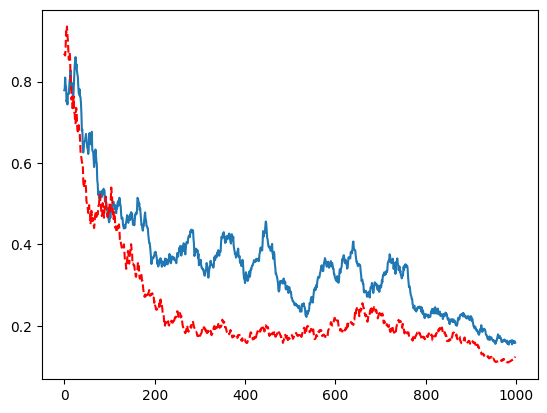

In [ ]:
plt.plot(partial_sigma_norms)
plt.plot(full_sigma_norms,'r--')